# Titanic - Machine Learning from Disaster.

## 載入套件及資料

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
'''
from google.colab import files

uploaded = files.upload()
'''

'\nfrom google.colab import files\n\nuploaded = files.upload()\n'

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submit = pd.read_csv('gender_submission.csv')

##  檢查空值

In [ ]:
# info() 查看dataframe 的摘要
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## 觀察資料分布

In [ ]:
# describe() 查看統計資訊
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## 資料合併

In [ ]:
data = train.append(test)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### reset_index
由於使用append合併之後會造成index重複問題，因此要將index重新設定

In [ ]:
# inplace=True: 不建立新資料，直接使用原始資料進行修改。 若=False, 原始index值依舊是亂的。
# drop=True: 將原本(可能是亂的)的index 列去掉。 若=False, 亂的index列會保留下來。
data.reset_index(inplace=True, drop=True)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## 資料分析

### 生存與死亡比例
死亡約六成，生存約四成。

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


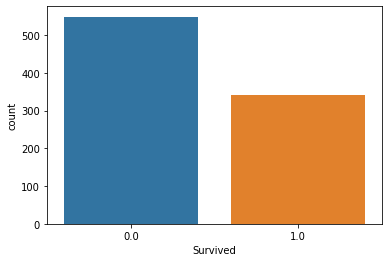

In [ ]:
sns.countplot(data['Survived'])

### 艙等與生存率之關係
1艙等生存率最高，艙等愈小死亡率愈低。

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


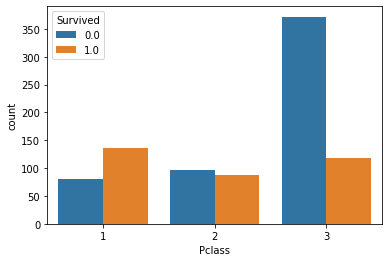

In [ ]:
sns.countplot(data['Pclass'], hue=data['Survived'])

### 年齡與生存率之關係
年齡小的存活比例高出許多。

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


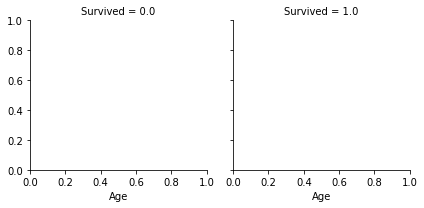

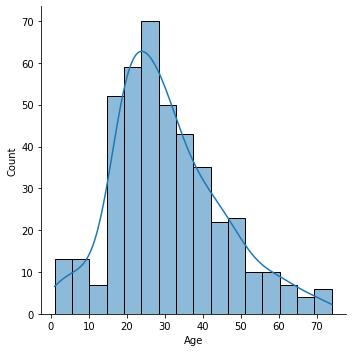

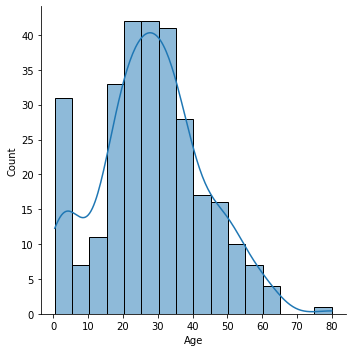

In [ ]:
# kde 為趨勢線
g = sns.FacetGrid(data, col='Survived')
g.map(sns.displot, 'Age', kde=True)  

In [ ]:
# 經過一些反覆的測試把“父母＋小孩”加上“兄弟姊妹＋丈夫妻子”的數量變成一個新的欄位叫做家庭大小，在預測上會更為準確
data['Family_Size'] = data['Parch'] + data['SibSp']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


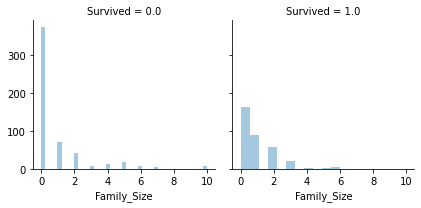

In [ ]:
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Family_Size', kde=False)

## 提取稱謂
將 Name 中的稱謂提取出來，提升預測的準確度。

In [ ]:
# str.split(', ') 以, 為分列基準。
# expand=True, 將資料分列。
data['Title1'] = data['Name'].str.split(', ', expand=True)[1]

In [ ]:
data['Name'].str.split(', ', expand=True).head(3)

,0,1
0,Braund,Mr. Owen Harris
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss. Laina


In [ ]:
data['Title1'].head(3)

0                               Mr. Owen Harris
1    Mrs. John Bradley (Florence Briggs Thayer)
2                                   Miss. Laina
Name: Title1, dtype: object

In [ ]:
data['Title1'] = data['Title1'].str.split('.', expand=True)[0]

In [ ]:
data['Title1'].head(3)

0      Mr
1     Mrs
2    Miss
Name: Title1, dtype: object

In [ ]:
data['Title1'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

### 使用稱謂做分析

####  各個稱謂的性別數
如: Master皆為男性。

In [ ]:
pd.crosstab(data['Title1'], data['Sex']).T.style.background_gradient(cmap='summer_r')

Title1,Capt,Col,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Sex,,,,,,,,,,,,,,,,,,
female,0,0,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0,1
male,1,4,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1,0


####  各個稱謂的生存率
如: Master 的生存率為約6成。

In [ ]:
pd.crosstab(data['Title1'], data['Survived']).T.style.background_gradient(cmap='summer_r')

Title1,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0.0,1,1,1,4,1,0,1,17,55,0,0,436,26,0,6,0,0
1.0,0,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1,1


####  各個稱謂的平均年齡
如: Master 的平均年齡為5歲。

In [ ]:
data.groupby(['Title1'])['Age'].mean()

Title1
Capt            70.000000
Col             54.000000
Don             40.000000
Dona            39.000000
Dr              43.571429
Jonkheer        38.000000
Lady            48.000000
Major           48.500000
Master           5.482642
Miss            21.774238
Mlle            24.000000
Mme             24.000000
Mr              32.252151
Mrs             36.994118
Ms              28.000000
Rev             41.250000
Sir             49.000000
the Countess    33.000000
Name: Age, dtype: float64

###  稱謂合併
將較少數量的稱謂與多數的稱謂合併。

In [ ]:
data['Title2'] = data['Title1'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','the Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
          ['Miss','Mrs','Miss','Mr','Mr','Mrs','Mrs','Mr','Mr','Mr','Mr','Mr','Mr','Mrs'])

In [ ]:
data['Title2'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master'], dtype=object)

In [ ]:
pd.crosstab(data['Title2'], data['Sex']).T.style.background_gradient(cmap='summer_r')

Title2,Master,Miss,Mr,Mrs
Sex,,,,
female,0,264,1,201
male,61,0,782,0


In [ ]:
pd.crosstab(data['Title2'], data['Survived']).T.style.background_gradient(cmap='summer_r')

Title2,Master,Miss,Mr,Mrs
Survived,,,,
0.0,17,55,451,26
1.0,23,130,87,102


##  提取票號資訊
英文代碼可能代表房間位置，後面號碼無意義可省略。

In [ ]:
# 若票號只有號碼，以 'X' 表示。
data['Ticket_info'] = data['Ticket'].apply(lambda x : x.replace(".","").replace("/","").strip().split(' ')[0] if not x.isdigit() else 'X')

In [ ]:
data['Ticket_info'].unique()

array(['A5', 'PC', 'STONO2', 'X', 'PP', 'CA', 'SCParis', 'SCA4', 'A4',
       'SP', 'SOC', 'WC', 'SOTONOQ', 'WEP', 'STONO', 'C', 'SCPARIS',
       'SOP', 'Fa', 'LINE', 'FCC', 'SWPP', 'SCOW', 'PPP', 'SC', 'SCAH',
       'AS', 'SOPP', 'FC', 'SOTONO2', 'CASOTON', 'SCA3', 'STONOQ', 'AQ4',
       'A', 'LP', 'AQ3'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


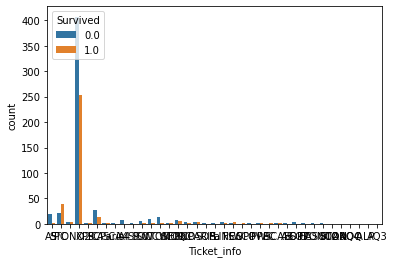

In [ ]:
sns.countplot(data['Ticket_info'], hue=data['Survived'])

## 補遺漏值

###  登船港口(Embarked)
只遺漏少數，補上出現次數最多的'S'。

In [ ]:
data['Embarked'] = data['Embarked'].fillna('S')

###  費用(Fare)
只遺漏一筆，補上平均值。

In [ ]:
data['Fare'] = data['Fare'].fillna(data['Fare'].mean())

##  取出 Cabin 前面的英文字母
取出 Cabin 前面的英文字母，剩下的用 NoCabin 表示。

In [ ]:
data['Cabin'].head(10)

0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
7     NaN
8     NaN
9     NaN
Name: Cabin, dtype: object

In [ ]:
# lambda 匿名函式，不須定義名稱。
data["Cabin"] = data['Cabin'].apply(lambda x : str(x)[0] if not pd.isnull(x) else 'NoCabin')

In [ ]:
data["Cabin"].unique()

array(['NoCabin', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


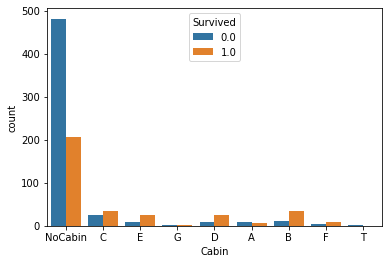

In [ ]:
sns.countplot(data['Cabin'], hue=data['Survived'])

##  將類別資料轉為整數

In [ ]:
data['Sex'] = data['Sex'].astype('category').cat.codes
data['Embarked'] = data['Embarked'].astype('category').cat.codes
data['Pclass'] = data['Pclass'].astype('category').cat.codes
data['Title1'] = data['Title1'].astype('category').cat.codes
data['Title2'] = data['Title2'].astype('category').cat.codes
data['Cabin'] = data['Cabin'].astype('category').cat.codes
data['Ticket_info'] = data['Ticket_info'].astype('category').cat.codes

data

|  | col1 | col2 | col3 |
| --- | --- | --- | --- |
| 0 | A | aa | yes |
| 1 | B | bb | no |
| 2 | C | bb | yes |
| 3 | A | cc | yes |

<hr>

data.astype('category')

|  | col1 | col2 | col3 |
| --- | --- | --- | --- |
| 0 | 0 | 0 | 1 |
| 1 | 1 | 1 | 0 |
| 2 | 2 | 1 | 1 |
| 3 | 0 | 2 | 1 |


In [ ]:
data['Cabin'].astype('category').dtype

CategoricalDtype(categories=[0, 1, 2, 3, 4, 5, 6, 7, 8], ordered=False)

In [ ]:
data['Cabin'].astype('category').unique()

[7, 2, 4, 6, 3, 0, 1, 5, 8]
Categories (9, int64): [7, 2, 4, 6, ..., 0, 1, 5, 8]

In [ ]:
data['Cabin'].astype('category').describe()

count     1309
unique       9
top          7
freq      1014
Name: Cabin, dtype: int64

## 使用隨機森林(Random Forest)演算法來推測年齡
結合多個弱學習器來建構一個強穩的模型


RandomForestRegressor

Kaggle -> 4-51

[n_estimators](http://www.taroballz.com/2019/05/25/ML_RandomForest_Classifier/)

[random_state](https://www.jianshu.com/p/4deb2cb2502f) -> 值可以隨機設定，設定固定的值確保輸出一樣  -  [reference](https://medium.com/jameslearningnote/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC4-2%E8%AC%9B-%E5%85%B1%E4%BA%AB%E5%96%AE%E8%BB%8A%E9%9C%80%E6%B1%82%E9%A0%90%E6%B8%AC-%E5%89%8D17-%E6%8E%92%E5%90%8D-505ed7100825)

In [ ]:
# 消除非空值的異常值
dataAgeNull = data[data["Age"].isnull()]
dataAgeNotNull = data[data["Age"].notnull()]
remove_outlier = dataAgeNotNull[(np.abs(dataAgeNotNull["Fare"]-dataAgeNotNull["Fare"].mean())>(4*dataAgeNotNull["Fare"].std()))|
                      (np.abs(dataAgeNotNull["Family_Size"]-dataAgeNotNull["Family_Size"].mean())>(4*dataAgeNotNull["Family_Size"].std()))                     
                     ]
# 將資料迴歸，並進行預測
rfModel_age = RandomForestRegressor(n_estimators=2000,random_state=42)  # n_estimators:弱學習器的個數，森林中樹木的數量；random_state:控制構建樹時使用的樣本隨機性
ageColumns = ['Embarked', 'Fare', 'Pclass', 'Sex', 'Family_Size', 'Title1', 'Title2','Cabin','Ticket_info']
rfModel_age.fit(remove_outlier[ageColumns], remove_outlier["Age"]) # fit -> 將其標準化

# 預測年齡
ageNullValues = rfModel_age.predict(X= dataAgeNull[ageColumns])
dataAgeNull.loc[:,"Age"] = ageNullValues # loc 利用index的標籤取出資料

# 將預測的年齡  與  原先擁有年齡的資料  合併
data = dataAgeNull.append(dataAgeNotNull)
data.reset_index(inplace=True, drop=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
# DataFrame.sort_values() 對 DataFrame 進行排序
dataTrain = data[pd.notnull(data['Survived'])].sort_values(by=["PassengerId"])
dataTest = data[~pd.notnull(data['Survived'])].sort_values(by=["PassengerId"])

In [ ]:
dataTrain.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_Size', 'Title1',
       'Title2', 'Ticket_info'],
      dtype='object')

In [ ]:
dataTrain = dataTrain[['Survived', 'Age', 'Embarked', 'Fare',  'Pclass', 'Sex', 'Family_Size', 'Title2','Ticket_info','Cabin']]
dataTest = dataTest[['Age', 'Embarked', 'Fare', 'Pclass', 'Sex', 'Family_Size', 'Title2','Ticket_info','Cabin']]

In [ ]:
dataTrain

,Survived,Age,Embarked,Fare,Pclass,Sex,Family_Size,Title2,Ticket_info,Cabin
263,0.0,22.000000,2,7.2500,2,1,1,2,2,7
264,1.0,38.000000,0,71.2833,0,0,1,3,14,2
265,1.0,26.000000,2,7.9250,2,0,0,1,31,7
266,1.0,35.000000,2,53.1000,0,0,1,3,36,2
267,0.0,35.000000,2,8.0500,2,1,0,2,36,7
...,...,...,...,...,...,...,...,...,...,...
973,0.0,27.000000,2,13.0000,1,1,0,2,36,7
974,1.0,19.000000,2,30.0000,0,0,0,1,36,1
176,0.0,19.099409,2,23.4500,2,0,3,1,34,7
975,1.0,26.000000,0,30.0000,0,1,0,2,36,2


## Model training 
使用Random Forest 預測存活率。

[criterion](https://ithelp.ithome.com.tw/articles/10228027) -> 決策樹的分類依據 - [gini index 公式範例](https://ithelp.ithome.com.tw/articles/10204450) 、 [RandomForest 介紹](https://rstudio-pubs-static.s3.amazonaws.com/378052_30d987a09ea54b6db5aa1e82f5dce6bf.html)

[min_samples](https://www.facebook.com/notes/python-scikit-learn/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92_ml_decisiontreeclassifier%E6%B1%BA%E7%AD%96%E6%A8%B9/802425689936465/) -> 限制決策樹，避免樹長過高造成overfit

[oob_score](https://towardsdatascience.com/what-is-out-of-bag-oob-score-in-random-forest-a7fa23d710) -> 被忽略遺漏的資料

[n_jobs](https://ithelp.ithome.com.tw/articles/10234203) -> =n: n個組合同步執行  ；  = -1: 使用cpu的所有處理器做同步執行

[oob_score_](https://www.coder.work/article/6657620) -> float使用袋外估計值獲得的訓練數據集的分數

[random_state](http://www.taroballz.com/2019/05/15/ML_decision_tree_detail/) -> 生成同一棵樹，讓模型穩定

In [ ]:
from sklearn.ensemble import RandomForestClassifier
 
rf = RandomForestClassifier(criterion='gini',         # gini不純度表示一個隨機選中的樣本在子集中被分錯的可能性。
                             n_estimators=1000,
                             min_samples_split=12,    # 最少需要多少樣本數量才會再往下展開新的節點
                             min_samples_leaf=1,      # 每一節點的最小樣本數，達成才會產生該節點
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1) 

rf.fit(dataTrain.iloc[:, 1:], dataTrain.iloc[:, 0])  # iloc: 利用index的位置取出資料
print("%.4f" % rf.oob_score_)

0.8294


[concat](http://violin-tao.blogspot.com/2017/06/pandas-2-concat-merge.html) -> axis=1 左右資料合併 ； axis=0 直向合併

In [ ]:
pd.concat((pd.DataFrame(dataTrain.iloc[:, 1:].columns, columns = ['variable']), 
           pd.DataFrame(rf.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]

,variable,importance
4,Sex,0.264997
2,Fare,0.163890
6,Title2,0.152698
0,Age,0.131891
3,Pclass,0.091048
5,Family_Size,0.070839
8,Cabin,0.067029
7,Ticket_info,0.031735
1,Embarked,0.025873


## Reference
[資料分析&機器學習 第4.1講 : Kaggle競賽-鐵達尼號生存預測(前16%排名)](https://medium.com/jameslearningnote/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC4-1%E8%AC%9B-kaggle%E7%AB%B6%E8%B3%BD-%E9%90%B5%E9%81%94%E5%B0%BC%E8%99%9F%E7%94%9F%E5%AD%98%E9%A0%90%E6%B8%AC-%E5%89%8D16-%E6%8E%92%E5%90%8D-a8842fea7077)